In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv
%matplotlib inline

# import scipy and statsmodels libraries to use inbuild stats functions
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# read the csv file 
df = pd.read_csv('studentInfo.csv')


/Applications/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# convert data in the original dataset from categorical to numerical (it is easier to analyse)
df_encoded = pd.get_dummies(df, columns=['age_band','gender','disability', 'highest_education','imd_band','region', 'final_result'], drop_first=True)
df_encoded.columns

Index(['code_module', 'code_presentation', 'id_student',
       'num_of_prev_attempts', 'studied_credits', 'age_band_35-55',
       'age_band_55<=', 'gender_M', 'disability_Y',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region',
       'final_result_Fail', 'final_result_Pass', 'final_result_Withdrawn'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(df_encoded[[ 
       'num_of_prev_attempts', 'studied_credits', 'age_band_35-55',
       'age_band_55<=', 'gender_M', 'disability_Y',
       'highest_education_HE Qualification',
       'highest_education_Lower Than A Level',
       'highest_education_No Formal quals',
       'highest_education_Post Graduate Qualification', 'imd_band_10-20',
       'imd_band_20-30%', 'imd_band_30-40%', 'imd_band_40-50%',
       'imd_band_50-60%', 'imd_band_60-70%', 'imd_band_70-80%',
       'imd_band_80-90%', 'imd_band_90-100%', 'region_East Midlands Region',
       'region_Ireland', 'region_London Region', 'region_North Region',
       'region_North Western Region', 'region_Scotland',
       'region_South East Region', 'region_South Region',
       'region_South West Region', 'region_Wales',
       'region_West Midlands Region', 'region_Yorkshire Region']].values, 
        (df.final_result == "Withdrawn").values,random_state=5)

clf = LogisticRegression()

# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# check the accuracy on the training set
print('Training accuracy:',clf.score(Xlr, ylr))
# check the accuracy from the testing data.
print('Test accuracy:',accuracy_score(clf.predict(Xtestlr), ytestlr))

Training accuracy: 0.697635411553
Test accuracy: 0.696527181249


Data Prep
Training
Predicting
[False False False ..., False False False]
class probabilities: [[ 0.70219784  0.29780216]
 [ 0.6784059   0.3215941 ]
 [ 0.66707329  0.33292671]
 ..., 
 [ 0.69715898  0.30284102]
 [ 0.75905892  0.24094108]
 [ 0.58609081  0.41390919]]


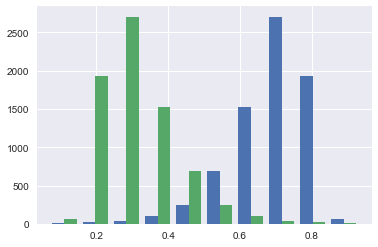

Evaluating
Using 10-fold cross-validation
cross validation scores: [ 0.69815951  0.6997955   0.6993865   0.7006135   0.69243354  0.69447853
  0.71317512  0.69476268  0.68686042  0.6966844 ]
mean score: 0.697634970448
generating metrics
accurancy score: 0.697436596673
roc score: 0.639329757166
f1 score: 0.176623376623
classification report:
             precision    recall  f1-score   support

      False       0.70      0.97      0.81      5048
       True       0.58      0.10      0.18      2286

avg / total       0.67      0.70      0.62      7334

confusion matrix
[[4877  171]
 [2048  238]]
plotting ROC curve


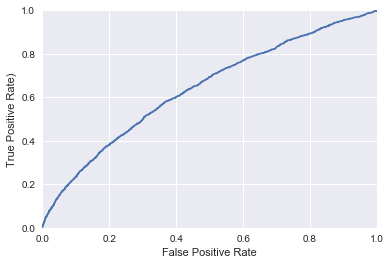

Done


In [4]:
# evaluate the model by splitting into train and test sets

print('Data Prep')

X_train, X_test, y_train, y_test = train_test_split(Xlr, ylr, test_size=0.3, random_state=0)

print('Training')
model2 = LogisticRegression()
model2.fit(X_train, y_train)

print('Predicting')
# predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

# generate class probabilities
probs = model2.predict_proba(X_test)
print('class probabilities:',probs)
plt.hist(probs) 
plt.show()

print('Evaluating')
# evaluate the model using 10-fold cross-validation
print('Using 10-fold cross-validation')
scores = cross_val_score(LogisticRegression(), Xlr, ylr, scoring='accuracy', cv=10)
print('cross validation scores:',scores)
print('mean score:',scores.mean())

# generate evaluation metrics
print('generating metrics')
print('accurancy score:',metrics.accuracy_score(y_test, predicted))
print('roc score:',metrics.roc_auc_score(y_test, probs[:, 1]))
print('f1 score:',metrics.f1_score(y_test, predicted))
print('classification report:')
print(metrics.classification_report(y_test, predicted))
print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))


# plot ROC curve 
print('plotting ROC curve')
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs[:, 1]) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

print('Done')

** Using classification algorithms, we can predict Withdrawal upto 70% accurately only based on demographic student profile.**